In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

## Оценка и улучшение качества модели

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# создаем синтетический набор данных
X, y = make_blobs(random_state=0)
# разобъем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и подгоняем его на обучающем наборе
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем качество модели на тестовом наборе
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.88


### Перекрестная проверка

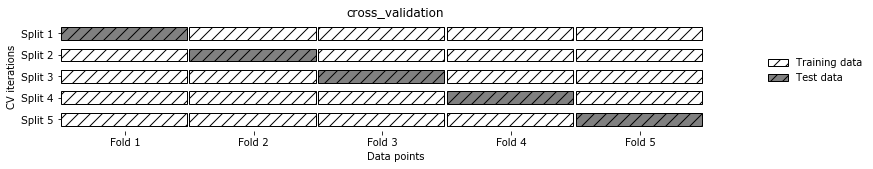

In [3]:
mglearn.plots.plot_cross_validation()

#### Перекрестная проверка в scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [ 0.96078431  0.92156863  0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [6]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.96


### Преимущества перекрестной проверки

### Стратифицированная k-блочная перекрестная проверка и другие стратегии

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


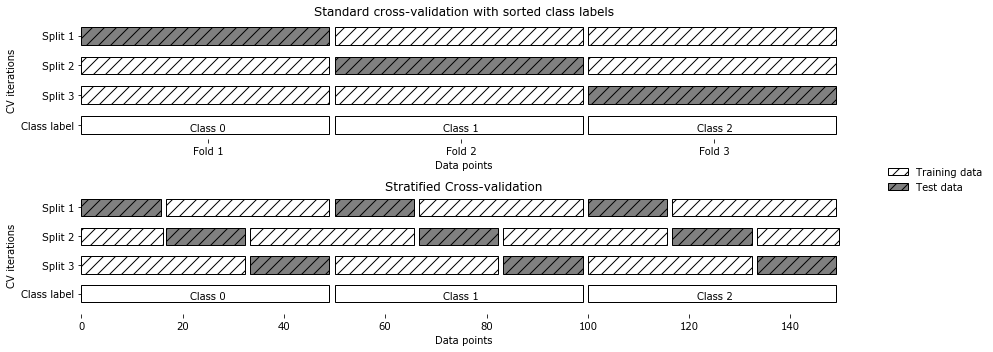

In [8]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("Значения правильности перекрестной проверки:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [11]:
kkfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[ 0.9   0.96  0.96]


#### Перекрестная проверка с исключением по одному

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Количество итераций cv: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций cv:  150
Средняя правильность: 0.95


#### Перекрестная проверка со случайными перестановками при разбиении

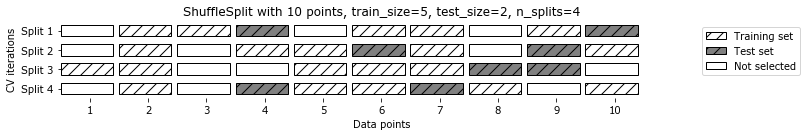

In [14]:
mglearn.plots.plot_shuffle_split()

![shuffle_split](images/06_shuffle_split.png)

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[ 0.98666667  0.86666667  0.85333333  0.93333333  0.94666667  0.89333333
  0.93333333  0.90666667  0.97333333  0.93333333]


#### Перекрестная проверка с использованием групп

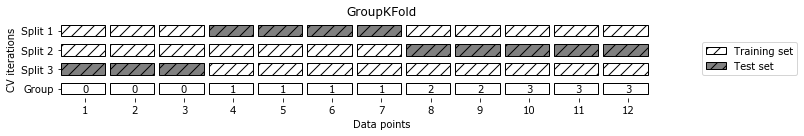

In [16]:
mglearn.plots.plot_group_kfold()

In [17]:
from sklearn.model_selection import GroupKFold
# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же группе,
# затем следующие четыре и так далее.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[ 0.75        0.8         0.66666667]


### Решетчатый поиск

#### Простой решетчатый поиск

In [18]:
# реализация наивного решетчатого поиска
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


#### Опасность переобучения параметров и проверочный набор данных

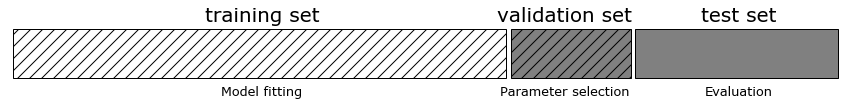

In [19]:
mglearn.plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих 
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


#### Решетчатный поиск с перекрестной проверкой

In [21]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров,
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки 
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате 
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

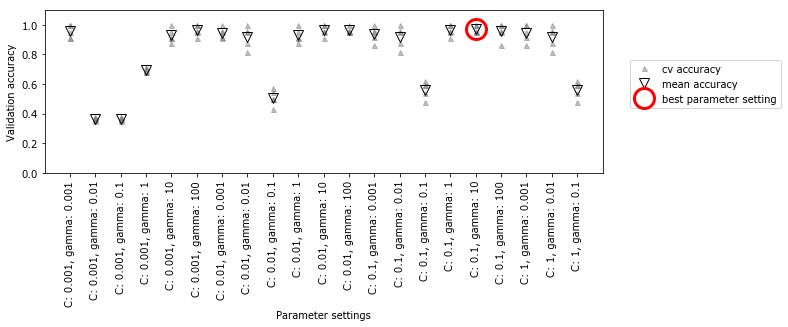

In [22]:
mglearn.plots.plot_cross_val_selection()

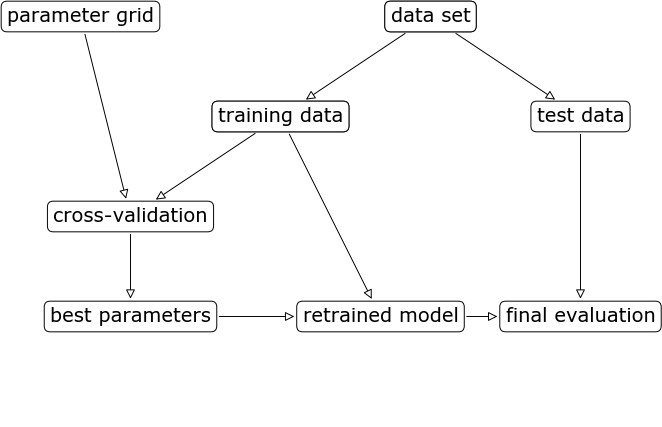

In [23]:
mglearn.plots.plot_grid_search_overview()

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [29]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 100, 'gamma': 0.01}
Наилучшее значение кросс-валидац. правильности: 0.97


In [30]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Анализ результатов перекрестной проверки

In [31]:
import pandas as pd
# преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# показываем первые 5 строк
display(results.head())

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002193,0.000802,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000747,0.000401,0.011371,0.002852
1,0.000600,0.000400,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.000491,0.011371,0.002852
2,0.000601,0.000401,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000491,0.000491,0.011371,0.002852
3,0.000797,0.000200,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000398,0.000400,0.011371,0.002852
4,0.000801,0.000200,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000400,0.000401,0.011371,0.002852


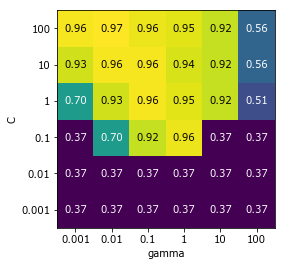

In [32]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим теплокарту средних значений правильности перекрестной проверки
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

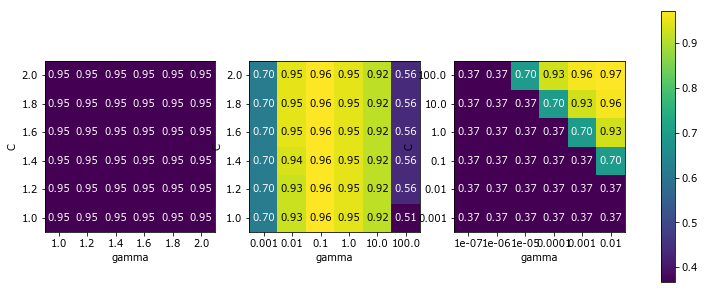

In [33]:
ffig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
   
    # строим теплокарту средних значений правильности перекрестной проверки
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [34]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [35]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности: 0.97


In [36]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения на странице:
display(results.T)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00100045,0.000797796,0.000996876,0.00100055,0.00119653,0.000997353,0.0010006,0.000399923,0.00100031,0.000600386,...,0.000600481,0.000600338,0.00100079,0.00140095,0.000600338,0.000600481,0.000600433,0.000400257,0.000600576,0.000400305
mean_score_time,0.000200129,0.000400162,0.000401115,0.000800562,0.000200129,0.000200224,0,0.000600433,0,0.000400496,...,0.000200176,0.000400305,0.000200129,0.000200129,0.000200176,0,0.000200224,0.000200081,0.000200176,0.000200176
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


#### Применение различных стратегий перекрестной проверки с помощью решетчатого поиска

#### Вложенная перекрестная проверка

In [37]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднеее значение правильности перекрестной проверки: ", scores.mean())

Значения правильности перекрестной проверки:  [ 0.96666667  1.          0.9         0.96666667  1.        ]
Среднеее значение правильности перекрестной проверки:  0.966666666667


In [38]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке
    # (метод split возвращает индексы)	
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
            # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
            # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [39]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
          StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


#### Распараллеливание перекрестной проверки и решетчатого поиска

### Метрики качества модели и их вычисление
#### Помните о конечной цели

#### Метрики для бинарной классификации
##### Типы ошибок
##### Несбалансированные наборы данных

In [40]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [41]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


In [43]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.84
правильность logreg: 0.98


##### Матрица ошибок

In [44]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Матрица ошибок:\n{}".format(confusion))

Матрица ошибок:
[[401   2]
 [  8  39]]


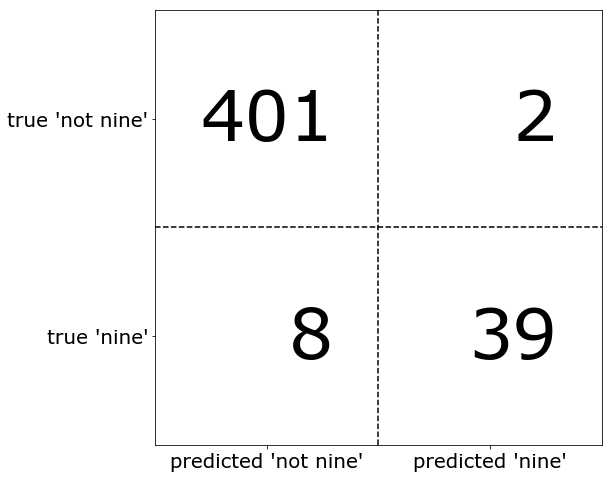

In [45]:
mglearn.plots.plot_confusion_matrix_illustration()

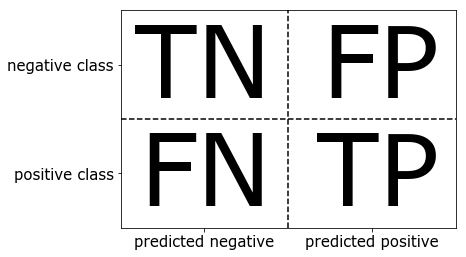

In [46]:
mglearn.plots.plot_binary_confusion_matrix()

In [47]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель:
[[360  43]
 [ 43   4]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия
[[401   2]
 [  8  39]]


###### Связь с правильностью
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### Точность, полнота и F-мера
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [48]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(
        f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(
        f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.09
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.89


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["не-девятка", "девятка"]))

             precision    recall  f1-score   support

 не-девятка       0.90      1.00      0.94       403
    девятка       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(classification_report(y_test, pred_dummy,
                            target_names=["не-девятка", "девятка"]))

             precision    recall  f1-score   support

 не-девятка       0.89      0.89      0.89       403
    девятка       0.09      0.09      0.09        47

avg / total       0.81      0.81      0.81       450



In [51]:
print(classification_report(y_test, pred_logreg,
                            target_names=["не-девятка", "девятка"]))

             precision    recall  f1-score   support

 не-девятка       0.98      1.00      0.99       403
    девятка       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



##### Принимаем во внимание неопределенность

In [52]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)                                     

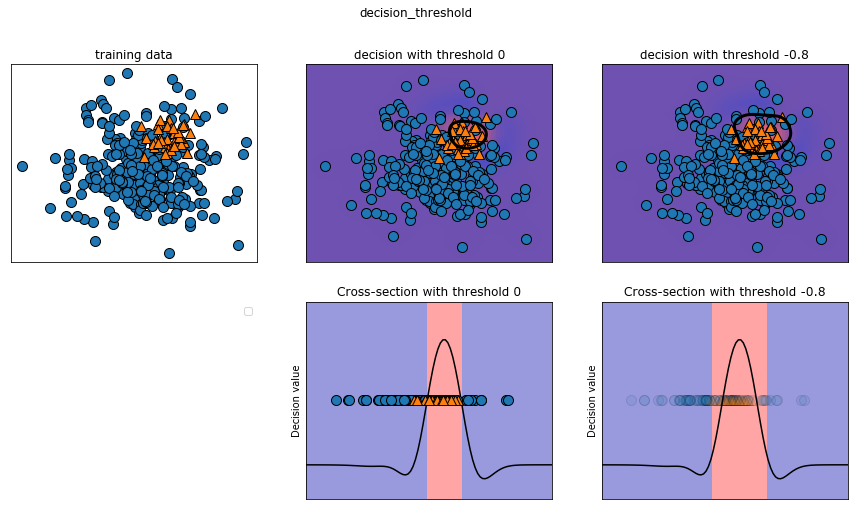

In [53]:
mglearn.plots.plot_decision_threshold()

In [54]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [55]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [56]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



##### Кривые точности-полноты и ROC-кривые

In [57]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

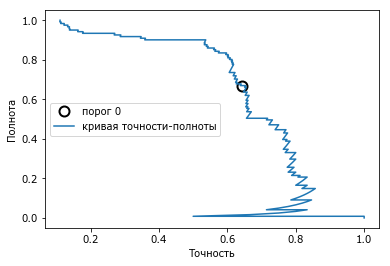

In [58]:
# используем больший объем данных, чтобы получить более гладкую кривую
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="порог 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

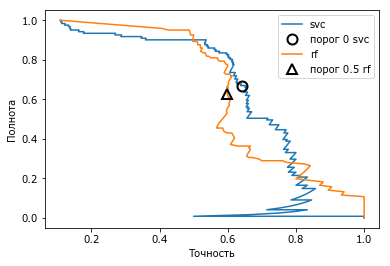

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# в RandomForestClassifier есть predict_proba, но нет decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="порог 0 svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="порог 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")


In [60]:
print("f1-мера random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1-мера svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-мера random forest: 0.610
f1-мера svc: 0.656


In [61]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность random forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность random forest: 0.660
Средняя точность svc: 0.666


##### Рабочая характеристика приемника (ROC) и AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

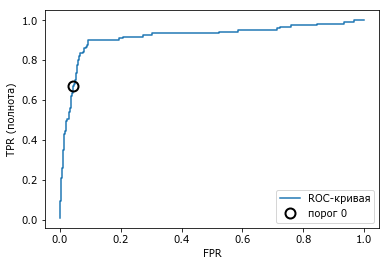

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

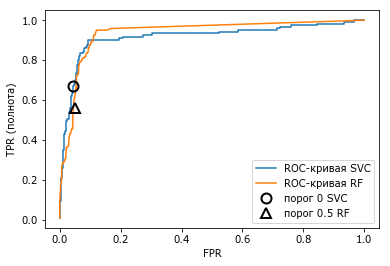

In [63]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC-кривая SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC-кривая RF")

plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="порог 0 SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="порог 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [64]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC для случайного леса: {:.3f}".format(rf_auc))
print("AUC для SVC: {:.3f}".format(svc_auc))

AUC для случайного леса: 0.937
AUC для SVC: 0.916


gamma = 1.00 правильность = 0.90 AUC = 0.50
gamma = 0.05 правильность = 0.90 AUC = 1.00
gamma = 0.01 правильность = 0.90 AUC = 1.00


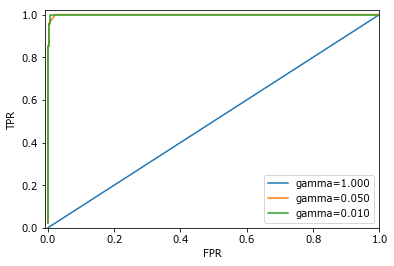

In [65]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} правильность = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Метрики для мультиклассовой классификации

In [66]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Правильность: {:.3f}".format(accuracy_score(y_test, pred)))
print("Матрица ошибок:\n{}".format(confusion_matrix(y_test, pred)))

Правильность: 0.953
Матрица ошибок:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


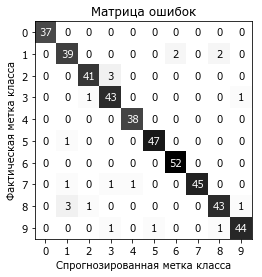

In [67]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Спрогнозированная метка класса',
    ylabel='Фактическая метка класса', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Матрица ошибок")
plt.gca().invert_yaxis()

In [68]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [69]:
print("Микро-усредненная f1-мера: {:.3f}".format
       (f1_score(y_test, pred, average="micro")))
print("Mакро-усредненная f1-мера: {:.3f}".format
        (f1_score(y_test, pred, average="macro")))

Микро-усредненная f1-мера: 0.953
Mакро-усредненная f1-мера: 0.954


#### Метрики регрессии

### Использование метрик оценки для отбора модели

In [70]:
# метрика качества классификационной модели по умолчанию – правильность
print("Метрика качества по умолчанию: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                    scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
                          scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [ 0.89983306  0.89983306  0.89983306]
Метрика качества явно заданная правильность: [ 0.89983306  0.89983306  0.89983306]
Метрика качества AUC: [ 0.99372294  0.98957947  0.99594929]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск c использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск c использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.970
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [72]:
# используем метрику качества AUC:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nРешетчатый поиск с использованием AUC")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))


Решетчатый поиск с использованием AUC
Наилучшие параметры: {'gamma': 0.01}
Наилучшее значение перекр проверки (AUC): 0.997
AUC на тестовом наборе: 1.000
Правильность на тестовом наборе: 1.000


In [73]:
from sklearn.metrics.scorer import SCORERS
print("Доступные объекты scorer:\n{}".format(sorted(SCORERS.keys())))

Доступные объекты scorer:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### Выводы и перспективы